<a href="https://colab.research.google.com/github/drpetros11111/TS_UD_Tr/blob/main/Section_5_Working_with_Time_Series_in_Python_Completed_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

# Import Python libraries commonly used for data analysis, time series analysis, and visualization:

-----------------------

    pandas (pd)
Used for data manipulation and analysis, especially with DataFrames.

------------
    numpy (np)
Used for numerical operations and working with arrays.

---------------------
    matplotlib.pyplot (plt)
A plotting library for creating static, interactive, and animated visualizations.

-----------------------
    statsmodels.graphics.tsaplots (sgt)

Provides functions for plotting time series analysis graphics, such as ACF and PACF plots.

--------------------
    statsmodels.tsa.stattools (sts)

Contains statistical tests and tools for time series analysis, like the Augmented Dickey-Fuller test for stationarity.

-----------------------------------
    statsmodels.tsa.seasonal.seasonal_decompose

A function for decomposing time series data into trend, seasonality, and residual components.

------------------------
    seaborn (sns)
A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics.

-------------------
    sns.set()
Sets the aesthetic style of the plots to be generated by Seaborn.

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

/tmp/ipython-input-3988913709.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')


# Load a CSV file and prepares it for time series analysis:

-----------------
    raw_csv_data = pd.read_csv("/content/Index2018.csv")
Reads the data from the specified CSV file into a pandas DataFrame called raw_csv_data.

------------------
    df_comp = raw_csv_data.copy()
Creates a copy of the DataFrame and assigns it to df_comp. This is good practice to avoid modifying the original data.

-----------------------------
    df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
Converts the 'date' column to datetime objects. The dayfirst=True argument specifies that the date format in the CSV has the day before the month.

-----------------------------
    df_comp.set_index("date", inplace=True)
Sets the 'date' column as the index of the DataFrame. inplace=True modifies the DataFrame directly.

------------------------------
    df_comp = df_comp.asfreq('b')
Resamples the DataFrame to a business day frequency ('b'). This will add rows for missing business days.

-------------------
    df_comp = df_comp.fillna(method='ffill')
Fills any missing values (introduced by asfreq) using the forward-fill method. This means the last valid observation is used to fill the gaps.

The warning you see in the output FutureWarning

    DataFrame.fillna

with

    'method'

is deprecated and will raise in a future version.

----------------
Use obj.ffill() or obj.bfill() instead. indicates

that the way fillna is used with the method argument is deprecated. The recommended way is to use the dedicated ffill() or bfill() methods directly on the DataFrame.



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# iloc and loc are both ways to select data from a pandas DataFrame, but they use different methods for indexing

--------------------

##iloc (integer-location based indexing):
This method is used for selecting data by its integer position. You provide integer indices for the rows and columns you want to select.

It works similarly to standard Python list or NumPy array indexing.

--------------------------
##loc (label-based indexing)
This method is used for selecting data by its label (or index name). You provide the labels for the rows and columns you want to select.

This is particularly useful when your DataFrame has a meaningful index, such as dates or names.

-----------------------------
##Key Differences

Indexing Method: iloc uses integer positions, while loc uses labels (index names and column names).

##Slicing

When slicing with iloc, the end index is exclusive, just like in standard Python slicing. When slicing with loc, the end index is inclusive.

##Data Types
iloc expects integers or boolean arrays for indexing. loc expects labels (which can be various data types depending on your index and column names) or boolean arrays.

------------------------
In your code, df_comp.iloc[:size] uses iloc to select rows from the beginning up to (but not including) the integer position specified by size.

This is because you are splitting the DataFrame based on a calculated percentage of the total number of rows, which results in an integer index.

# White Noise

In time series analysis, **white noise** is a fundamental concept that represents a sequence of completely random data points. Think of it as pure, unpredictable randomness. A time series is considered white noise if it satisfies three key properties:

----------------------
### Key Properties

* **Zero Mean:**

The average value of the data points in the series is zero. The data fluctuates randomly around this central point.

* **Constant Variance:**

The spread or variability of the data points is consistent over time. There are no periods of high volatility followed by periods of low volatility. The "loudness" of the noise is constant.

* **Zero Autocorrelation:**

There is no relationship or correlation between data points at different times. The value at any given time is completely independent of its past or future values. In other words, knowing the value of a data point doesn't help you predict the value of any other data point in the series. This is the most crucial property.

***
------------------
### Why White Noise is Important

White noise is an extremely important concept in time series forecasting for two main reasons:

1.  **Model Diagnostics:**

When you build a time series forecasting model, the goal is to "explain" or capture all the patterns and dependencies in the data.

What's left over—the **residuals** (the difference between the actual values and the model's predictions)—should ideally be white noise. If your residuals are not white noise, it means your model has failed to capture some of the underlying patterns, and you can likely improve it.

2.  **Predictability:**

By definition, a white noise time series is entirely random and unpredictable. If your original time series is determined to be white noise, it means there's no pattern to model, and therefore, it cannot be forecasted.

The best prediction you can make for any future value is simply the mean of the series (which is zero for white noise).

***
----------------
### How to Check for White Noise

To determine if a time series or a set of model residuals is white noise, you can use a few diagnostic tools:

* **Line Plot:**

Visually inspect a plot of the data. Does it look like a random, "static" signal with no discernible trends or patterns?

* **Summary Statistics:**

Calculate the mean and variance to see if they are close to zero and constant over time.

* **Autocorrelation Plot (ACF):**

This is the most definitive test. An autocorrelation plot shows the correlation of the series with its lagged versions.

For a white noise series, you expect all the spikes in the ACF plot to be very close to zero and fall within the confidence intervals (usually represented by dashed lines).

Any significant spike outside these boundaries suggests that the series is not white noise.



In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

# This code generates a time series of "white noise".


This effectively creates a synthetic time series (wn) that has the same mean and standard deviation as your actual market value data, but with no underlying patterns or dependencies over time.

White noise is a random signal with a constant power spectral density, meaning it has equal power in any frequency band.

-----------------------
In this case, the code generates random numbers from a normal distribution:

    np.random.normal()

This is a NumPy function that generates random numbers from a normal (Gaussian) distribution.

--------------------
    loc = df.market_value.mean()

Sets the mean of the normal distribution to the mean of the market_value column in your DataFrame.

The code

    loc = df.market_value.mean()

does not create a column with the name 'loc' in your DataFrame.

In that line, loc is just the parameter name within the np.random.normal() function call. You are assigning the calculated mean of df.market_value to that parameter, which the function then uses to generate the random numbers for the white noise.

----------------------
    scale = df.market_value.std()
Sets the standard deviation of the normal distribution to the standard deviation of the market_value column in your DataFrame.

--------------------------
    size = len(df)

Specifies the number of random numbers to generate, which is equal to the number of rows in your DataFrame.

------------
This effectively creates a synthetic time series (wn) that has the same mean and standard deviation as your actual market value data, but with no underlying patterns or dependencies over time.

In [6]:
df['wn'] = wn

/tmp/ipython-input-672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [7]:
round(df.describe())

,market_value,wn
count,5021.0,5021.0
mean,1092.0,1090.0
std,293.0,289.0
min,439.0,165.0
25%,915.0,898.0
50%,1145.0,1090.0
75%,1316.0,1286.0
max,1570.0,2224.0


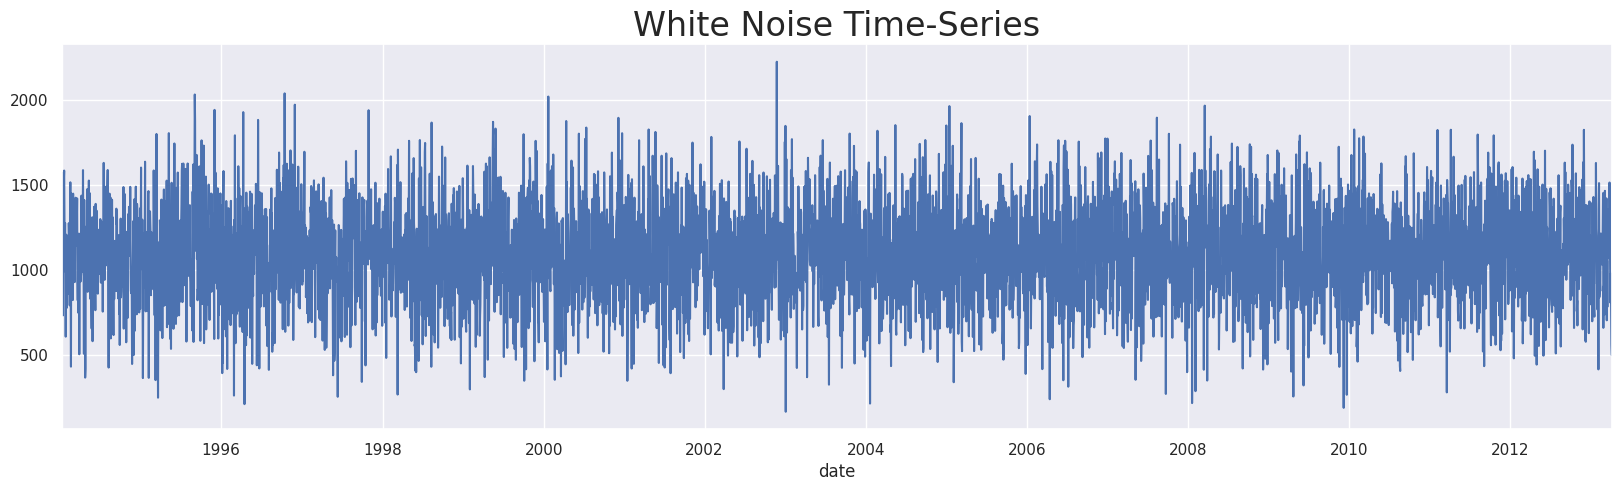

In [8]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

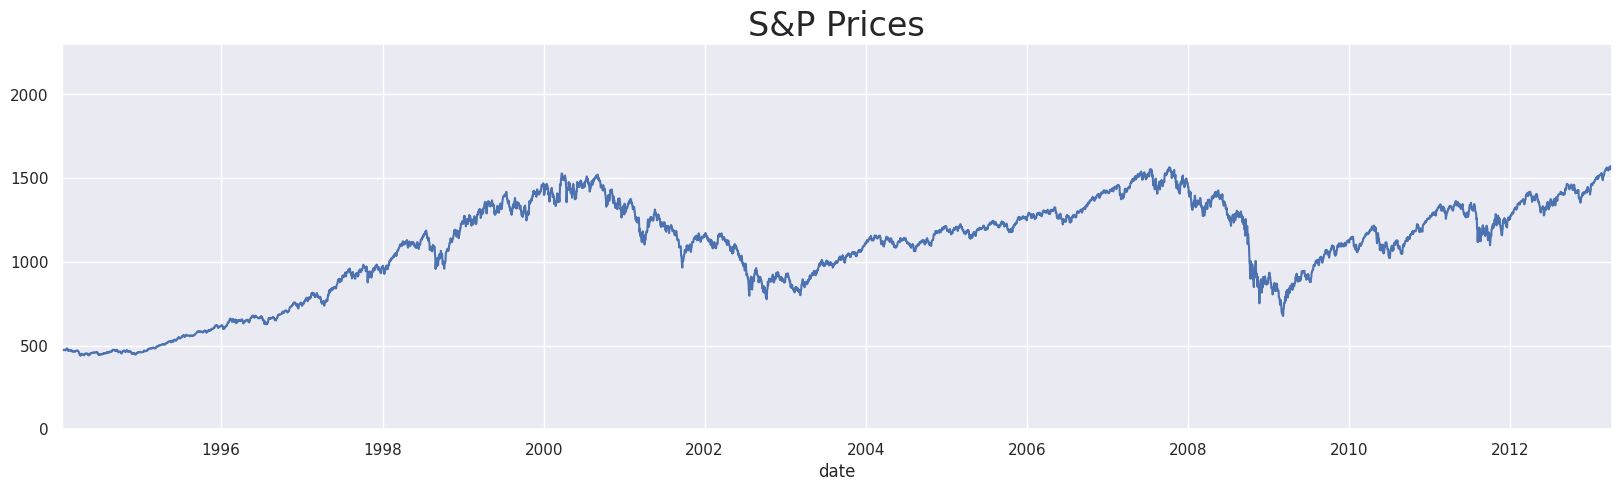

In [9]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

#Random Walk
A **random walk** is a time series model where the value at the current time step is equal to the value at the previous time step plus a random, unpredictable "step" or shock.

Imagine a drunkard staggering down a street: their next position is their current position plus a random direction and distance. The path they trace out is a random walk.

A key characteristic of a random walk is that it is **non-stationary**. This means its statistical properties, such as the mean and variance, change over time. The variance of a random walk grows with each step, so the series becomes more spread out the longer it goes on.

### The Random Walk Formula

The standard formula for a random walk is:

$Y_t = Y_{t-1} + \epsilon_t$

Where:

* $Y_t$ is the value of the time series at time $t$.
* $Y_{t-1}$ is the value at the previous time step.
* $\epsilon_t$ is a **white noise** error term.

This formula highlights a crucial point: the best prediction for the next value ($Y_t$) is simply the last observed value ($Y_{t-1}$) because the error term is unpredictable.

---

### Random Walk with Drift

A common variation is the **random walk with drift**, which includes a constant term that represents a predictable trend over time.

$Y_t = \mu + Y_{t-1} + \epsilon_t$

Here, $\mu$ is the drift term, which can be thought of as the average step size. This model suggests that the series will trend upwards or downwards by a constant amount on average, in addition to the random fluctuations.

---

### Random Walk vs. White Noise

It's easy to confuse a random walk with white noise, but they are fundamentally different:

| Feature | Random Walk | White Noise |
| :--- | :--- | :--- |
| **Stationarity** | **Non-stationary**. The mean and variance change over time. | **Stationary**. The mean and variance are constant over time. |
| **Autocorrelation** | **Highly correlated**. The value at time $t$ is strongly correlated with its previous values. | **Zero autocorrelation**. There is no correlation between past and present values. |
| **Predictability** | Unpredictable, except for the fact that the next value will likely be close to the last one. | Completely unpredictable. Knowing a past value gives no information about the future. |
| **Relationship** | A random walk is the **cumulative sum** of a white noise series. | White noise is the **difference** between consecutive values of a random walk. |

This video provides a practical explanation of random walks and white noise and their relationship in time series analysis. [White Noise and Random Walk – Time Series from Scratch in Python (Part 3)](https://www.youtube.com/watch?v=Q7vY__nghc4)
http://googleusercontent.com/youtube_content/2

In [11]:
rw = pd.read_csv("/content/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [12]:
round(rw.describe(),1)

,price
count,5021.0
mean,1269.9
std,444.2
min,585.5
25%,931.6
50%,1156.4
75%,1488.4
max,2715.5


In [ ]:
df['rw'] = rw.price

In [ ]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1059.089464,1122.139662
1994-01-10,475.27,885.137922,1080.347860
1994-01-11,474.13,680.919810,1082.095245
1994-01-12,474.17,1555.430981,1083.639265
1994-01-13,472.47,1157.200035,1067.146255


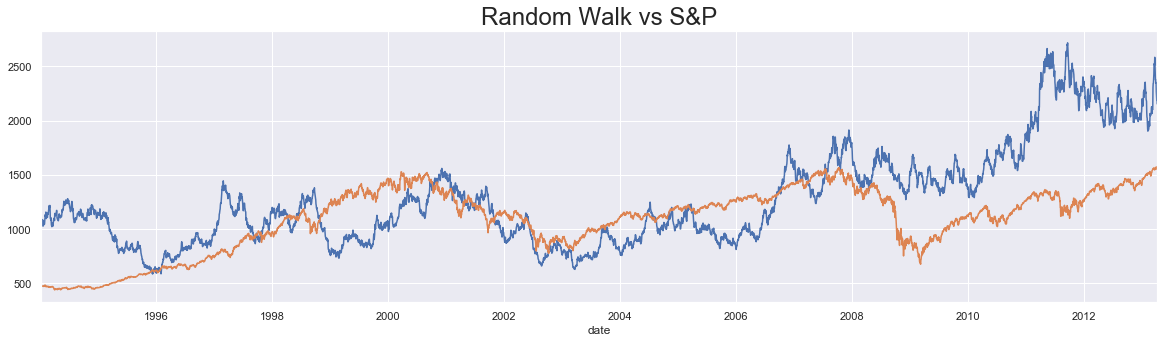

In [ ]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity

In [ ]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [ ]:
sts.adfuller(df.wn)

(-69.20331416010461,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70746.80114417049)

In [ ]:
sts.adfuller(df.rw)

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

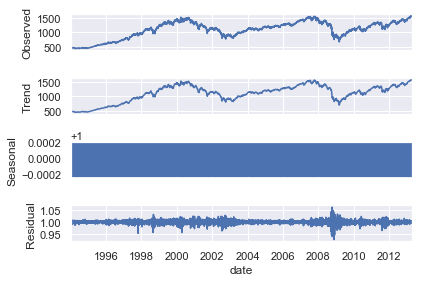

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

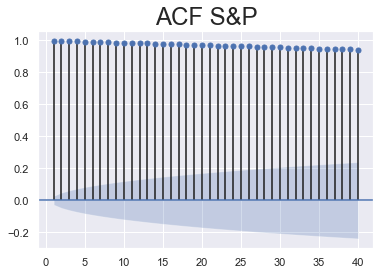

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF

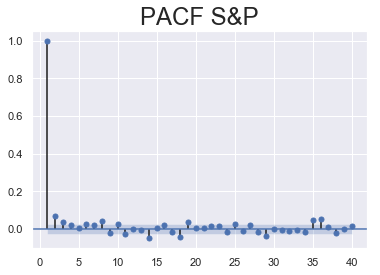

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

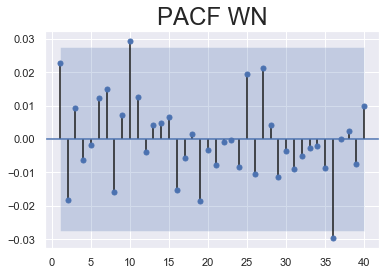

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()